In [57]:
# %load ../imports.py
import numpy as np
import pandas as pd
from pandas import DataFrame
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns


In [58]:
from sklearn.datasets import load_iris

dataset = load_iris(as_frame=True)

data: DataFrame
target: pd.Series
target_names: np.ndarray

data, target, target_names = dataset['data'], dataset['target'], dataset['target_names']
data['target'] = target
data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [59]:
print(data['target'].unique())

[0 1 2]


In [60]:
from sklearn.preprocessing import StandardScaler

X = data.drop(['target', 'sepal length (cm)', 'sepal width (cm)'], axis=1)
y = data['target']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [61]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.33, random_state=0)

In [62]:
from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression(multi_class='multinomial', random_state=0)
lr_model.fit(X_train, y_train)

LogisticRegression(multi_class='multinomial', random_state=0)

In [63]:
y_pred = lr_model.predict(X_test)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       0.90      0.95      0.92        19
           2       0.93      0.87      0.90        15

    accuracy                           0.94        50
   macro avg       0.94      0.94      0.94        50
weighted avg       0.94      0.94      0.94        50



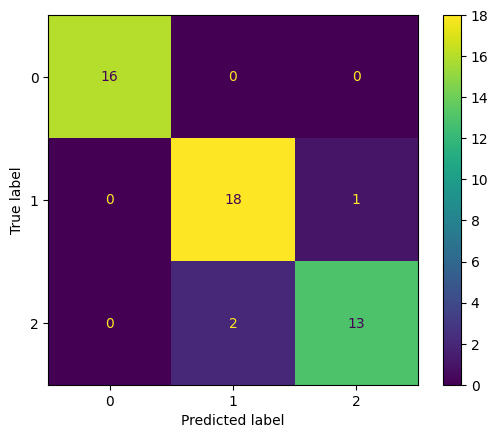

In [64]:
from sklearn.metrics import classification_report, ConfusionMatrixDisplay

print(classification_report(y_test, y_pred))
display = ConfusionMatrixDisplay.from_estimator(
    lr_model,
    X_test,
    y_test,
)
plt.show()

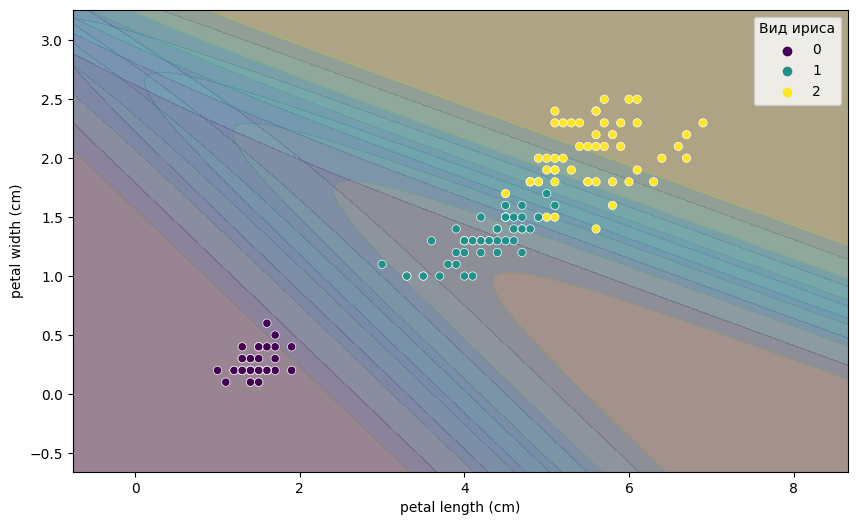

In [78]:
# sns.scatterplot(
#     data=data,
#     x='petal length (cm)',
#     y='petal width (cm)',
#     palette='bright',
#     hue=data['target'],
# )

xx_scaled, yy_scaled = np.meshgrid(np.linspace(X_scaled[:,0].min()-1, X_scaled[:,0].max()+1, 100),
                         np.linspace(X_scaled[:,1].min()-1, X_scaled[:,1].max()+1, 100))
grid_scaled = np.c_[xx_scaled.ravel(), yy_scaled.ravel()]

# Получаем предсказания
probs = lr_model.predict_proba(grid_scaled)

# Обратное масштабирование сетки для визуализации
grid_unscaled = scaler.inverse_transform(grid_scaled)
xx_unscaled = grid_unscaled[:,0].reshape(xx_scaled.shape)
yy_unscaled = grid_unscaled[:,1].reshape(yy_scaled.shape)

# Визуализация
plt.figure(figsize=(10, 6))

# Отрисовываем области решений
for i in range(3):
    plt.contourf(xx_unscaled, yy_unscaled, probs[:,i].reshape(xx_scaled.shape),
                 alpha=0.3, cmap='viridis')

sns.scatterplot(
    data=data,
    x='petal length (cm)',
    y='petal width (cm)',
    palette='viridis',
    hue=data['target'],
)

plt.legend(title='Вид ириса')
plt.show()